In [1]:
# ASSIGNMENT NO 3-ML

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Admission_Predict.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.drop(["Serial No."],axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
# To make chance of admit column in binary form o/p
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])
#df['Chance of Admit ']

In [7]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1.0
496,497,337,117,5,5.0,5.0,9.87,1,1.0
497,498,330,120,5,4.5,5.0,9.56,1,1.0
498,499,312,103,4,4.0,5.0,8.43,0,0.0


In [8]:
# seperate dependent and independent features i.e x and y
x= df.drop('Chance of Admit ',axis=1)
y=df["Chance of Admit "]

In [9]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [10]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
y=y.astype('int')

In [12]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int64

<Axes: xlabel='Chance of Admit ', ylabel='count'>

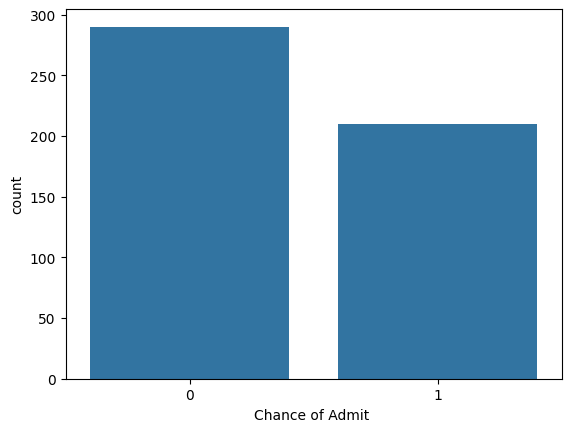

In [13]:
sns.countplot(x=y)

In [14]:
y.value_counts()

Chance of Admit 
0    290
1    210
Name: count, dtype: int64

In [15]:
# cross validation 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test= train_test_split(x,y,random_state=0,test_size=0.25)

In [16]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
239,240,299,100,1,1.5,2.0,7.89,0
59,60,311,104,2,2.0,2.0,8.30,0
406,407,322,103,4,3.0,2.5,8.02,1
391,392,318,106,3,2.0,3.0,8.65,0
411,412,313,94,2,2.5,1.5,8.13,0
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0
192,193,322,114,5,4.5,4.0,8.94,1
117,118,290,104,4,2.0,2.5,7.46,0
47,48,339,119,5,4.5,4.0,9.70,0


In [17]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,91,318,106,2,4.0,4.0,7.92,1
254,255,321,114,4,4.0,5.0,9.12,0
283,284,321,111,3,2.5,3.0,8.90,1
445,446,328,116,5,4.5,5.0,9.08,1
461,462,301,102,3,2.5,2.0,8.13,1
...,...,...,...,...,...,...,...,...
430,431,311,104,3,4.0,3.5,8.13,1
49,50,327,111,4,3.0,4.0,8.40,1
134,135,333,113,5,4.0,4.0,9.28,1
365,366,330,114,4,4.5,3.0,9.17,1


In [18]:
y_train

239    0
59     0
406    0
391    0
411    0
      ..
323    0
192    1
117    0
47     1
172    1
Name: Chance of Admit , Length: 375, dtype: int64

In [19]:
y_test

90     0
254    1
283    1
445    1
461    0
      ..
430    0
49     1
134    1
365    1
413    0
Name: Chance of Admit , Length: 125, dtype: int64

In [20]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier=DecisionTreeClassifier(random_state=0)

In [22]:
classifier

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
# To Train the model using classifire
classifier.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_predict = classifier.predict(x_test)

In [26]:
result=pd.DataFrame({
    'Actual':y_test,
    'predict':y_predict
})

In [28]:
result

,Actual,predict
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [29]:
#To Display the above result in Visualization form we go for Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

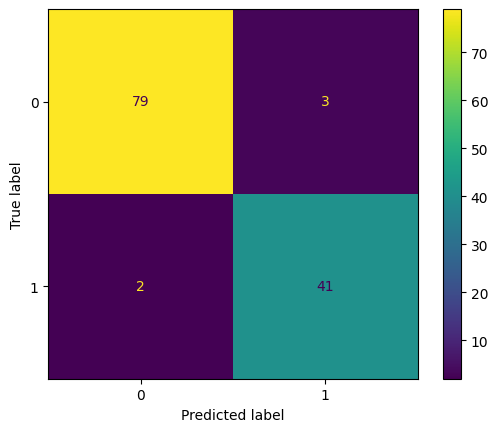

In [30]:
ConfusionMatrixDisplay.from_predictions(y_predict,y_test)

In [31]:
# for finding accuracy, precision, recall, f1 score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
accuracy_score(y_test,y_predict)

0.96

In [33]:
precision_score(y_test,y_predict)

0.9534883720930233

In [34]:
recall_score(y_test,y_predict)

0.9318181818181818

In [35]:
f1_score(y_test,y_predict)

0.9425287356321839

In [36]:
# for whole classification report
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.95      0.93      0.94        44

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



In [38]:
# check for existing entry [serial number-399] whether our model prediction is right or wrong

new=[[399,312,103,3,3.5,4.0,8.78,0]]

In [39]:
classifier.predict(new)

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [40]:
# check for new entry whether our model prediction is right or wrong
new1=[[501,412,203,4,4.5,4.0,9.78,0]]
classifier.predict(new1)[0]

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


np.int64(1)

[Text(0.5288461538461539, 0.9583333333333334, 'x[6] <= 8.735\ngini = 0.493\nsamples = 375\nvalue = [209, 166]'),
 Text(0.2564102564102564, 0.875, 'x[1] <= 318.5\ngini = 0.211\nsamples = 217\nvalue = [191, 26]'),
 Text(0.3926282051282051, 0.9166666666666667, 'True  '),
 Text(0.14102564102564102, 0.7916666666666666, 'x[6] <= 8.25\ngini = 0.103\nsamples = 183\nvalue = [173, 10]'),
 Text(0.11538461538461539, 0.7083333333333334, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.16666666666666666, 0.7083333333333334, 'x[4] <= 4.75\ngini = 0.224\nsamples = 78\nvalue = [68, 10]'),
 Text(0.10256410256410256, 0.625, 'x[2] <= 99.5\ngini = 0.191\nsamples = 75\nvalue = [67, 8]'),
 Text(0.05128205128205128, 0.5416666666666666, 'x[0] <= 361.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.02564102564102564, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15384615384615385, 0.

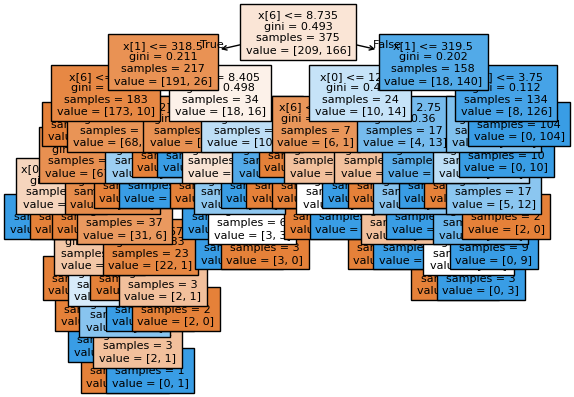

In [42]:
from sklearn.tree import plot_tree
plot_tree(classifier,fontsize=8,filled=True)

In [45]:
# for ploting tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
plt.figure(12,12)
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','AD']);

TypeError: Value after * must be an iterable, not int